# CSCI 250: Project 4 - Lucy Buhayenko

# Part 1

## Compute the coordinates of Cheese and Fresh fruits for the first two components.

#### cheese1 = (0.1 * 105) + (-0.2 * 103) + (0.4 * 103) + (0.5 * 66)  = 64.1
#### cheese2 = (0.2 * 105) + (0.1 * 103) + (-0.2 * 103) + (0.3 * 66)  = 30.5

#### freshfruits1 = (0.1 * 1102) + (-0.2 * 1137) + (0.4 * 957) + (0.5 * 674)  = 602.6
#### freshfruits2 = (0.2 * 1102) + (0.1 * 1137) + (-0.2 * 957) + (0.3 * 674)  = 344.9


#### Coordinate of Cheese for first component: 64.1
#### Coordinate of Cheese for second component: 30.5
#### Coordinate of Fresh Fruits for first component: 602.6
#### Coordinate of Fresh Fruits for second component: 344.9

## Compute the norms for each features and rank their importance related to the variance
#### England: sqrt(0.1squared + 0.2squared) = 0.224
#### Wales: sqrt(-0.2squared + 0.1squared) = 0.224
#### Scotland: sqrt(0.4squared + -0.2squared) = 0.447
#### N Ireland: sqrt(0.5squared + 0.3squared) = 0.583

## Ranking features by importance:
### 1. N Ireland
### 2. Scotland
### 3. Wales
### 4. England


# Part 2

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn import decomposition
from sklearn.decomposition import PCA
import plotly.express as px

## Student Lifestyle Dataset

In [2]:
df = pd.read_csv('student_lifestyle_dataset.csv')
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


## Looking at columns - There are 8 columns

In [3]:
df.columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

## Dropping Student ID because it not useful, and dropping non-numeric target variable - Stress_Level

In [4]:
df = df.drop(columns=['Student_ID', 'Stress_Level'])

## Checking if the dataset is clean: There are no missing values so there is no need for me to delete / replace any values

In [5]:
df.isnull().sum()

Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
dtype: int64

## I define X and y: label is GPA

In [6]:
y = df['GPA']
X = df.drop(columns=['GPA'])

## Correlation: 
### GPA and Study_Hours_Per_Day are highly positively correlated(0.73), so i delete Study_Hours_Per_Day

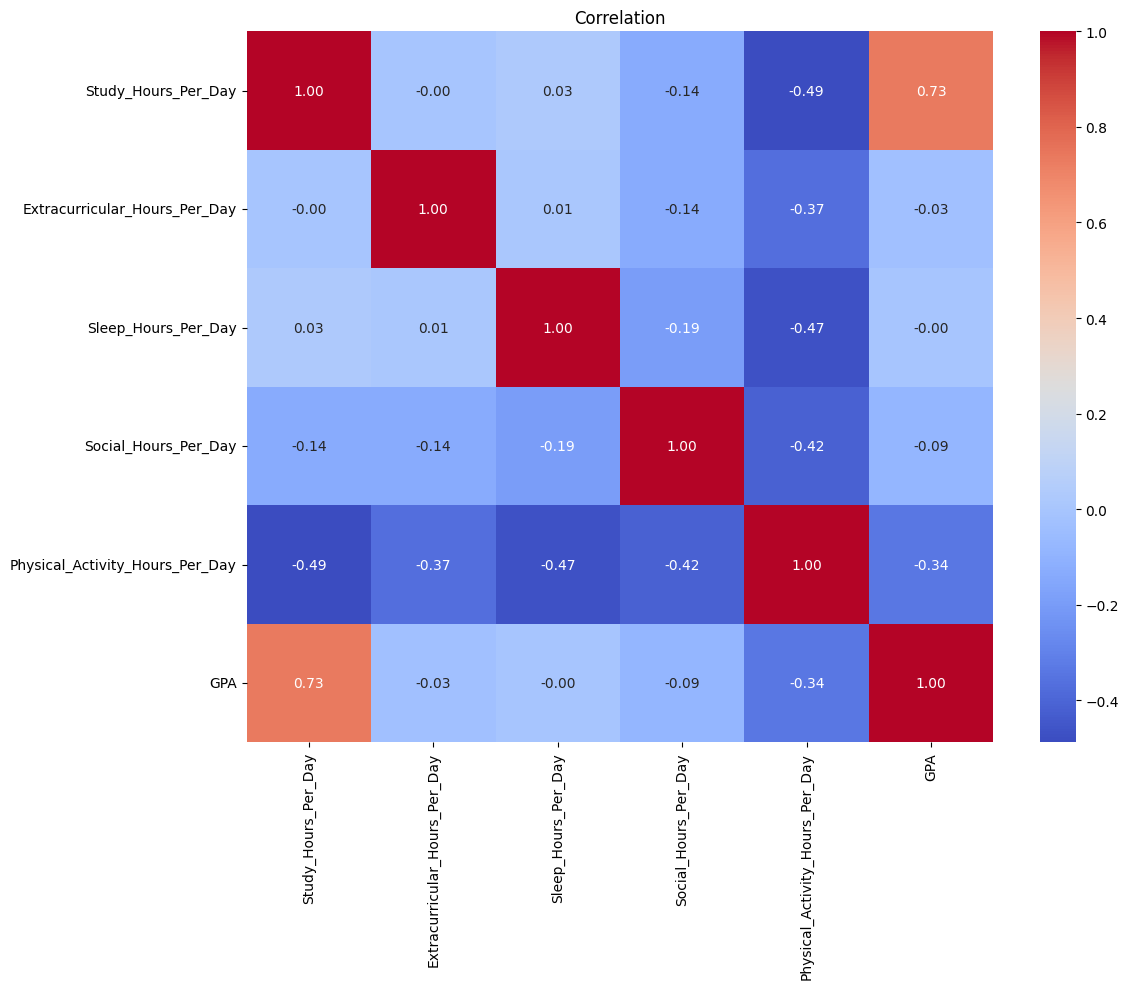

In [7]:
# Plot correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation")
plt.tight_layout()
plt.show()

### Here I delete the Study_Hours_Per_Day and redefine X

In [8]:
df = df.drop(columns=['Study_Hours_Per_Day'])
#redefining the features
X = df.drop(columns=['GPA'])

## Scaler:
### I scale the data

In [9]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA with 2 components

In [10]:
# PCA with 2 components
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)
explained_variance = pca2.explained_variance_ratio_
components = pca2.components_

## Plotting features in terms of PCA1 and PCA2
### Here is a scatter plot of the first two principal components (PCA1 and PCA2) after reducing the dataset's dimensions using PCA. These components capture as much variance in the data as possible. Each point represents a student and is colored based on their GPA, (low GPA = red, high GPA = green). PC1 explains 40.9% variance and PC2 explains 30.6% variance. The data points are spread fairly evenly which means that the PCs don't clearly separate high vs low GPA students. There is no strong clustering by GPA, which means that GPA doesn't align neatly with the dominant patterns in the feature data.


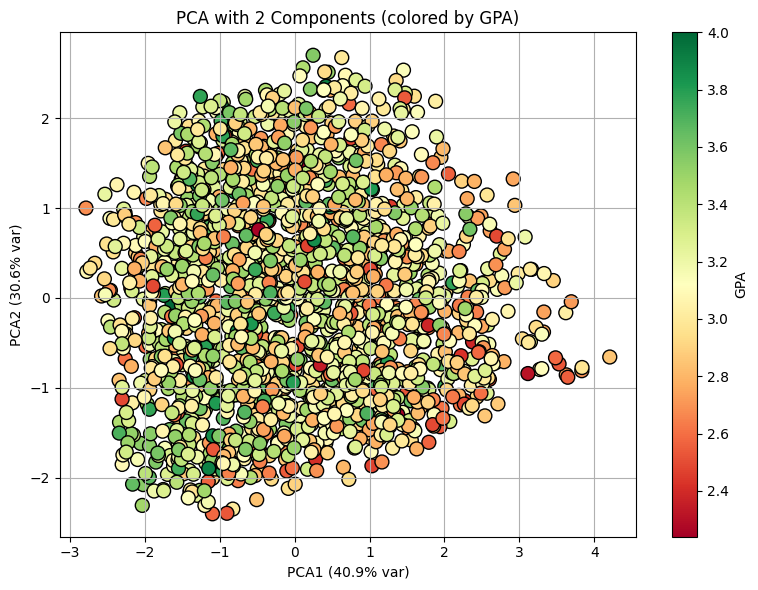

In [11]:
plt.figure(figsize=(8,6))
sc = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='RdYlGn', s=100, edgecolor='k')
plt.title("PCA with 2 Components (colored by GPA)")
plt.xlabel(f'PCA1 ({explained_variance[0]*100:.1f}% var)')
plt.ylabel(f'PCA2 ({explained_variance[1]*100:.1f}% var)')
plt.colorbar(sc, label='GPA')
plt.grid(True)
plt.tight_layout()
plt.show()

## Plotting the importance of the features related to PCA1 and PCA2
### Here I am trying to understand which original features are most influential in forming the PCA components. Here I visualize how each original feature contributes to PCA1 and PCA2 by plotting their weights (loadings) from the PCA components matrix. Each point on the scatter plot represents a feature, positioned according to its weight in PCA1 (x-axis) and PCA2 (y-axis), showing its relative importance and direction in these components. This graph shows that PCA1 separates students who are physically active(high PCA1) from those who sleep or spend time in extracurriculars(low PCA1). Also, PCA2 seperates students who are highly social(high PCA2) from those who sleep more or engage in extracurriculars(low PCA2). If high PCA1 and PCA2 then active and very social students. If low PCA1 and high PCA2 then very social but less physically active . If low PCA1 and PCA2 then more passive, they prioritize sleep and extracuricular work over social or physical activity. Finally, if high PCA1 and low PCA2 then physically active but not very social. Most important: social hours, then physical activity hours. Less important: sleep and extracuriculars(they contribute less to explaining total variation)


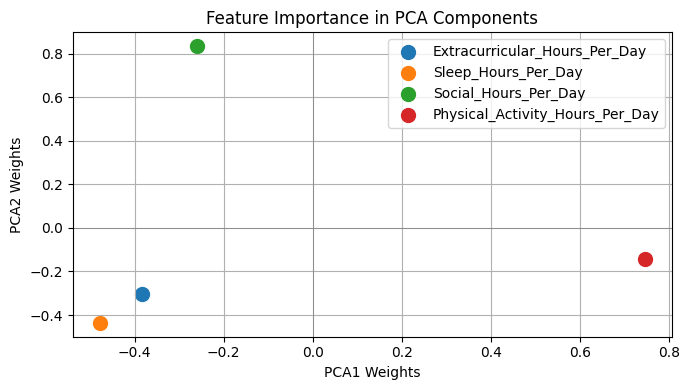

In [12]:
weights = pca2.components_  # shape (2, number_of_features)
feature_names = X.columns

plt.figure(figsize=(7,4))
for i, feature in enumerate(feature_names):
    plt.scatter(weights[0, i], weights[1, i], label=feature, s=100)

plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.xlabel('PCA1 Weights')
plt.ylabel('PCA2 Weights')
plt.title('Feature Importance in PCA Components')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Also another importance Graph:
### Higher PCA1 values correspond to being more physically active, while lower PCA1 might mean less active behaviour.
### Higher PCA2 represents more social students and lower PCA2 mean students who sleep or focus on extracurriculars instead of social time.

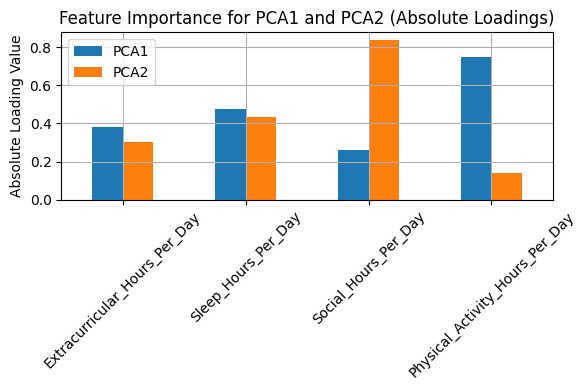

In [13]:
# Plot the importance of features related to PCA1 and PCA2
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
components_2d = pca_2d.components_
importance = np.abs(components_2d)  # absolute loadings

df_importance = pd.DataFrame(importance.T, columns=['PCA1', 'PCA2'], index=X.columns)

df_importance.plot(kind='bar', figsize=(6, 4))
plt.title('Feature Importance for PCA1 and PCA2 (Absolute Loadings)')
plt.ylabel('Absolute Loading Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Performing PCA with 3 components and Plotting the features in terms of PCA1, PCA2 and PCA3 in 3D
### Here I perform PCA to reduce the dataset to three principal components. I then create a DataFrame with these components and add the GPA values for coloring. Finally, i plot an interactive 3D scatter plot where points are colored by GPA using Plotly. This graph shows student's GPAs and (Blue - 4; Yellow - 3; Red - 2.5 and lower). Based on this graph I can say that most studnets GPAs usually range from 2.9 to 3.6 on average. PCA1, PCA2 and PCA3 explain 96.26% of variance

In [14]:
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px

# Fit PCA
pca_3 = PCA(n_components=3)
X_pca3 = pca_3.fit_transform(X_scaled)

# explained variance
explained_var = pca_3.explained_variance_ratio_ * 100  # Convert to %
df_pca3 = pd.DataFrame(X_pca3, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca3['GPA'] = df['GPA']

#  axis labels with explained variance
x_label = f"PCA1 ({explained_var[0]:.2f}% var)"
y_label = f"PCA2 ({explained_var[1]:.2f}% var)"
z_label = f"PCA3 ({explained_var[2]:.2f}% var)"

# Plot
fig = px.scatter_3d(df_pca3, 
                    x='PCA1', y='PCA2', z='PCA3',
                    color='GPA',
                    color_continuous_scale='spectral',
                    title='PCA with 3 Components - 3D plot colored by GPA',
                    labels={'PCA1': x_label, 'PCA2': y_label, 'PCA3': z_label})

fig.show()


## Checking how many PCA component are needed to explain 80% of the data
### Here I fit PCA on the scaled data without limiting the number of components to capture all variance directions. I calculate the cumulative explained variance ratio to see how much variance is explained as more components are included. Then, I plot this cumulative variance against the number of components, with a red dashed line marking the 80% variance threshold, which helps to identify the minimum number of components needed to explain at least 80% of the total variance. There are 3 PCA components to explain at least 80%.


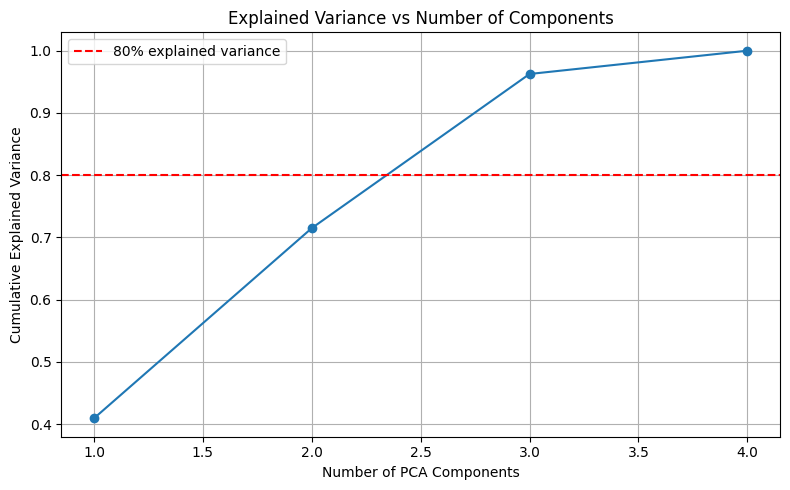

Number of PCA components to explain at least 80% variance: 3


In [15]:
# How many components needed to explain 80% variance
pca_full = decomposition.PCA()
pca_full.fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% explained variance')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

n_comp_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of PCA components to explain at least 80% variance: {n_comp_80}")